<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/lantibiotics/blob/main/lantibiotics_heatmap_raw_2023_09_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat map

In [ ]:
! pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# db = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta')

bee_13 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_13_S00_matches_cyp.tsv', sep='\t', header=None)
bee_20 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_20_S00_matches_cyp.tsv', sep='\t', header=None)
bee_25 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_25_S00_matches_cyp.tsv', sep='\t', header=None)
bee_33 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_33_S00_matches_cyp.tsv', sep='\t', header=None)
bee_41 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_41_S00_matches_cyp.tsv', sep='\t', header=None)
bee_4 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_4_S00_matches_cyp.tsv', sep='\t', header=None)
bee_66 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_66_S00_matches_cyp.tsv', sep='\t', header=None)
bee_75 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_75_S00_matches_cyp.tsv', sep='\t', header=None)

In [ ]:
bees_var = [bee_13, bee_20, bee_25, bee_33, bee_41, bee_4, bee_66, bee_75]
bees_names = ['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66', 'bee_75']

In [ ]:
from Bio import SeqIO
import requests
from io import StringIO

link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta"
data = requests.get(link).text

fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

lantibiotics_id_list = []

# Pretty print the fasta info
for seq in fasta_iterator:
  # print(seq.format("fasta"))
  lantibiotics_id_list.append(seq.id)

table_data = {#'№': range(1, len(lantibiotics_id_list) + 1),
              'Лантибиотик': [ str(i) for i in lantibiotics_id_list],
              # 'SM5_S9_R1_001': ['-'] * len(lantibiotics_id_list),
              # 'SM303_S24_R2_001': ['-'] * len(lantibiotics_id_list)
              }

In [ ]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


def bee_lantibiotics_data_preparation(bee, name, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :3].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 2]].set_index(1).rename(columns={2: f'{name}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names):

  df = pd.DataFrame(table_data).set_index('Лантибиотик')
  df.drop_duplicates(subset=['Лантибиотик'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df.fillna(0)


In [ ]:
bee_13 = bee_13.iloc[:, :3].sort_values(by=2).drop_duplicates(subset=[1])
bee_13

,0,1,2
437,NODE_1484_length_1734_cov_12.023824_1,CYP71B5,21.6
433,NODE_1484_length_1734_cov_12.023824_1,CYP261B1,21.8
445,NODE_1484_length_1734_cov_12.023824_1,CYP71A23,21.9
431,NODE_1484_length_1734_cov_12.023824_1,CYP71B38,21.9
438,NODE_1484_length_1734_cov_12.023824_1,CYP78A10,22.1
...,...,...,...
925,NODE_17358_length_289_cov_3.111111_1,CYP4F1,51.6
926,NODE_17358_length_289_cov_3.111111_1,Cyp4f14,51.6
915,NODE_17358_length_289_cov_3.111111_1,Cyp4f18,53.1
913,NODE_17358_length_289_cov_3.111111_1,Cyp4f17,53.1


In [ ]:
df = make_df_for_heatmap(bees_var, bees_names)
df

In [ ]:
df['sum'] = df.sum (axis=1)

In [ ]:
df.sort_values(by='sum', ascending=False, inplace=True)

In [ ]:
df

,bee_13,bee_20,bee_25,bee_33,bee_41,bee_4,bee_66,bee_75,sum
CYP4V5,37.3,40.1,0.0,38.9,37.3,0.0,35.9,38.9,228.4
CYP4V2,37.1,38.3,0.0,38.2,37.1,0.0,37.5,37.9,226.1
CYP4V7,37.8,39.3,0.0,37.8,37.8,0.0,35.3,37.8,225.8
CYP3A5_v1,30.9,31.8,32.4,30.9,30.9,31.8,28.9,0.0,217.6
CYP3A98,30.8,31.3,31.1,31.0,32.4,31.1,29.2,0.0,216.9
...,...,...,...,...,...,...,...,...,...
CYP71A18,0.0,0.0,0.0,0.0,0.0,0.0,25.3,0.0,25.3
CYP628B1,0.0,0.0,0.0,0.0,25.2,0.0,0.0,0.0,25.2
CYP102J1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0
CYP13A.d,0.0,0.0,0.0,24.8,0.0,0.0,0.0,0.0,24.8


<Axes: >

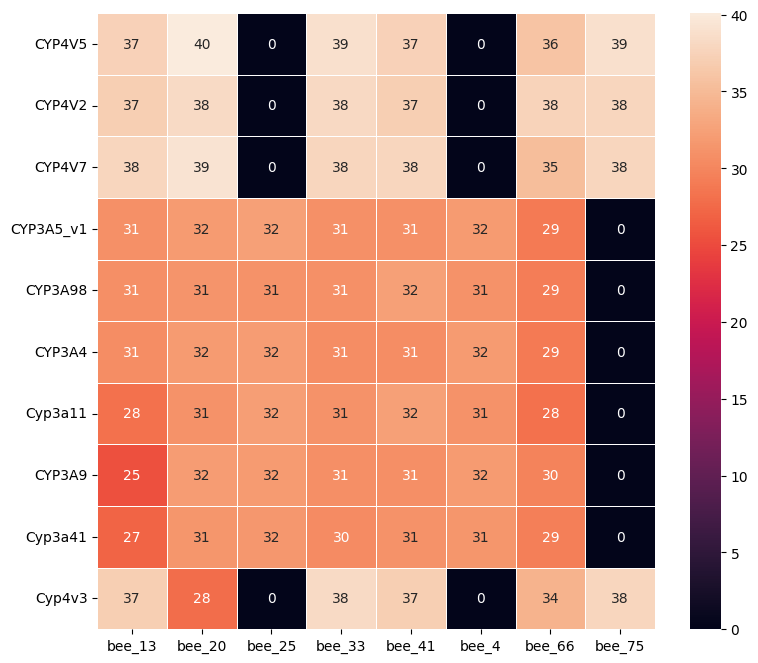

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df.iloc[:10, :8], annot=True, linewidths=.5, ax=ax)
#sns.heatmap(df, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")
#sns.heatmap(df, annot=True, linewidths=.5, ax=ax, fmt="d")

In [ ]:
num_rows, num_cols = df.shape
fig_width = max(10, num_cols * 2)
fig_height = max(8, num_rows * 0.5)

f, ax = plt.subplots(figsize=(fig_width, fig_height))
sns.heatmap(df, annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

plt.show()


<Axes: >

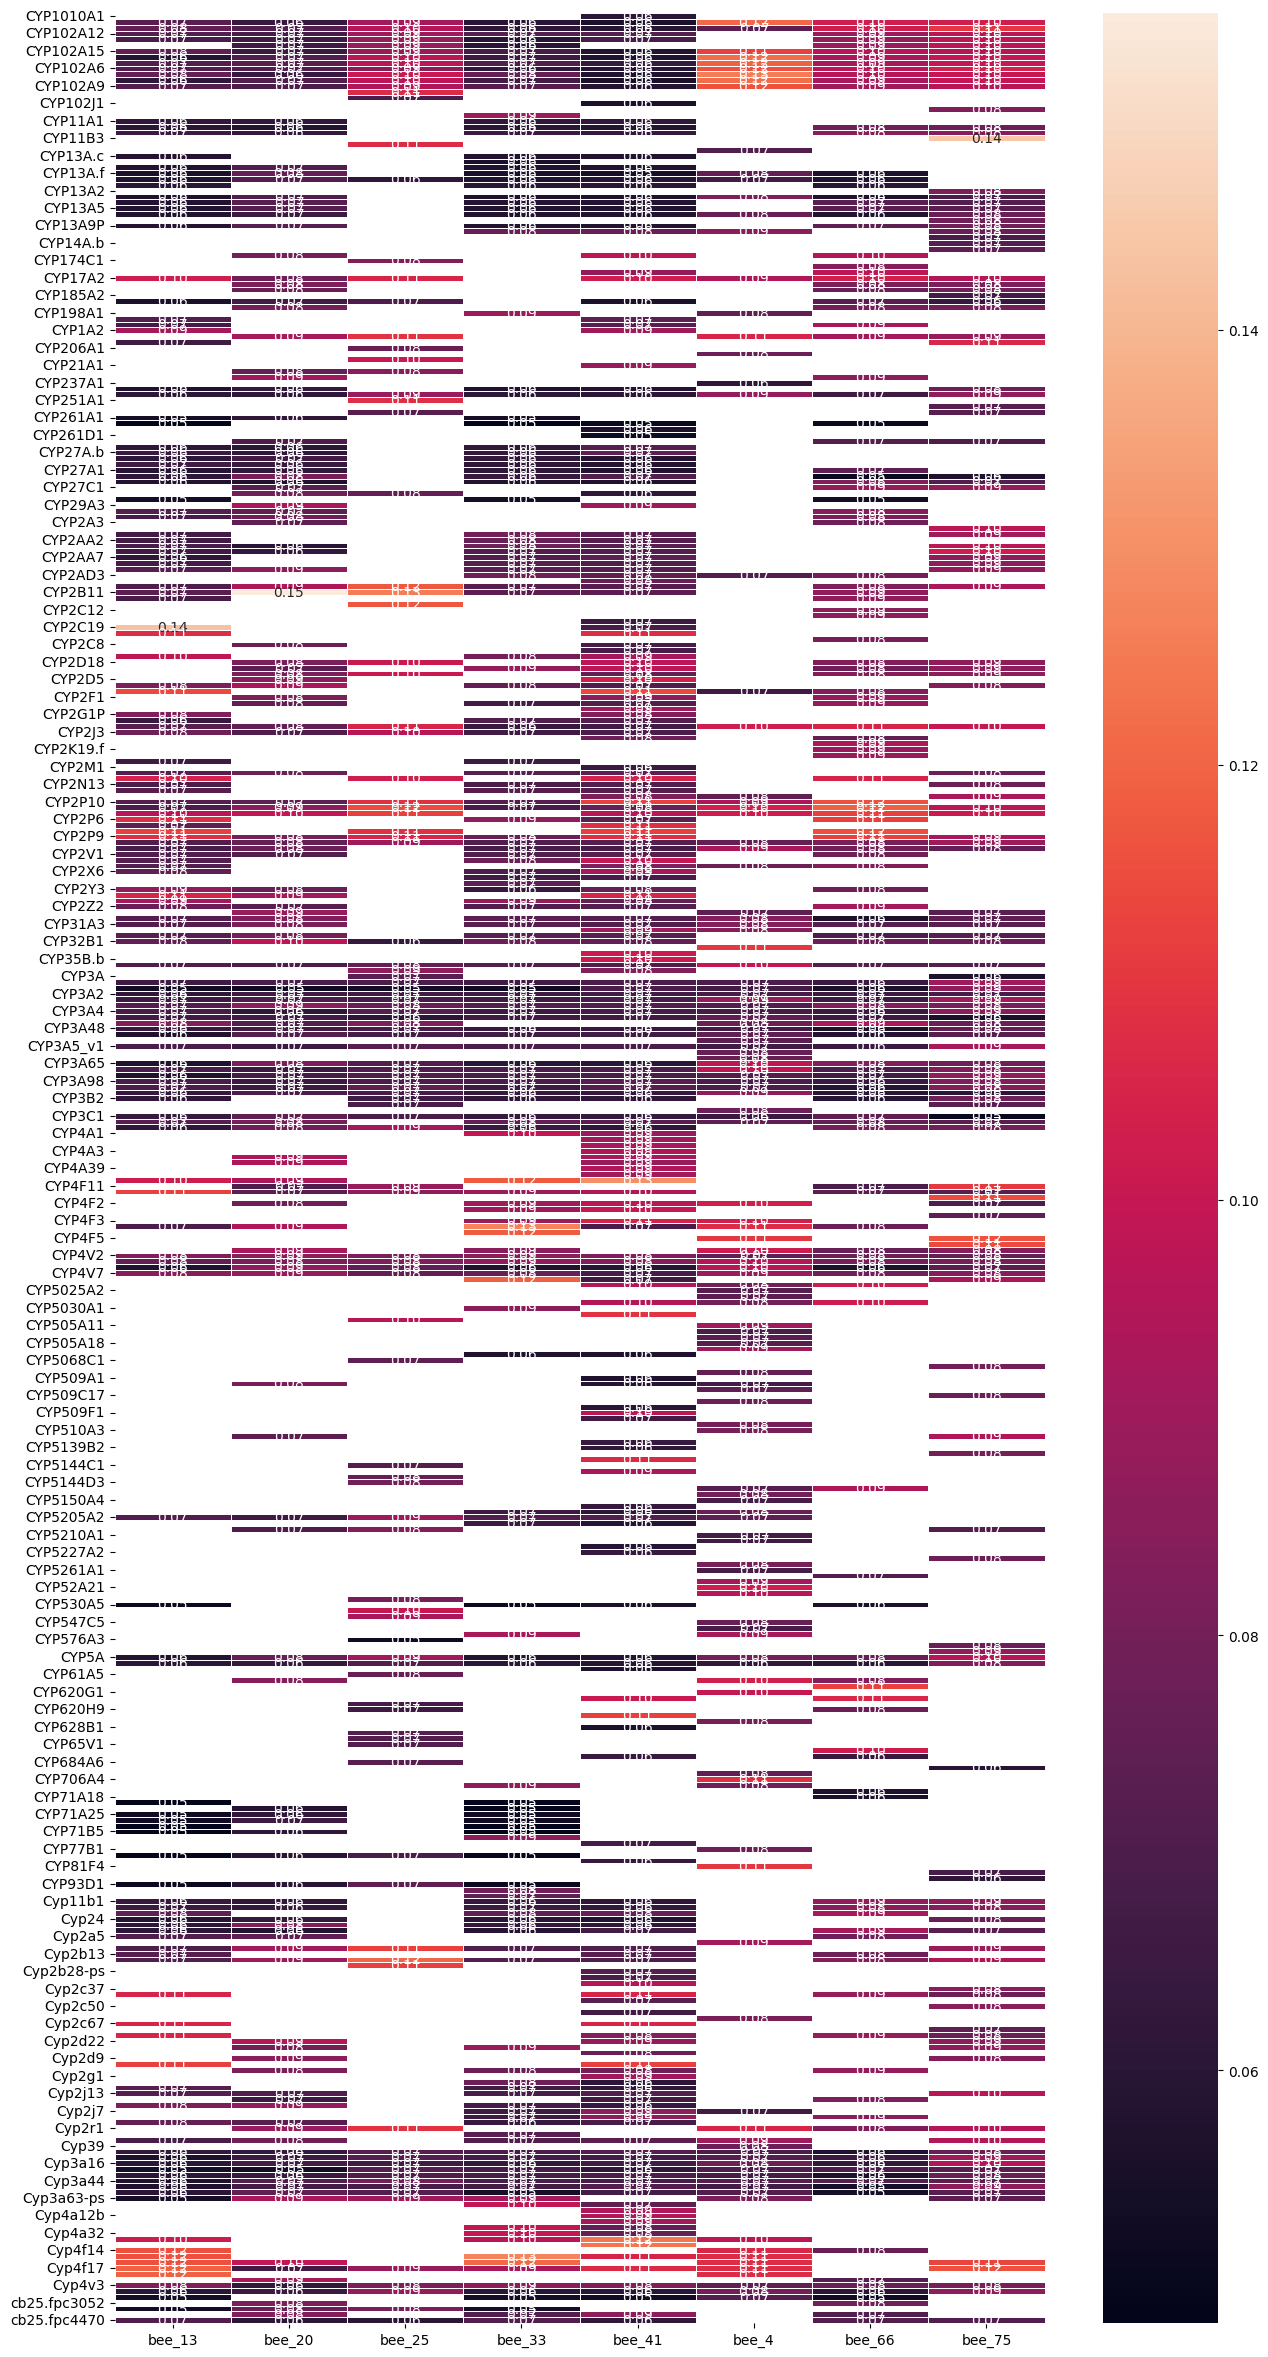

In [ ]:
# Вычисление процентного содержания
df_percent = df / df.sum().sum() * 100

# Отображение теплового графика
f, ax = plt.subplots(figsize=(15, 30))
sns.heatmap(df_percent, annot=True, linewidths=.5, ax=ax, fmt=".2f")


In [ ]:
link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta"
data = requests.get(link).text
fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

In [ ]:
lantibiotics_data = []
for seq in fasta_iterator:
    lantibiotics_data.append({'Лантибиотик': seq.id, 'Длина': len(seq.seq)})

In [ ]:
df_length = pd.DataFrame(lantibiotics_data)

In [ ]:
print(df.columns)
print(df_length.columns)

Index(['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66',
       'bee_75'],
      dtype='object')
Index(['Лантибиотик', 'Длина'], dtype='object')


In [ ]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


In [ ]:
data_250(bee_75).describe()

<ipython-input-28-ac28cb8f9dfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)


,2,3,4,5,6,7,8,9,10,11
count,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000
mean,34.90000,512.600000,284.080000,8.200000,9.480000,509.880000,38.800000,511.840000,1.520481e-73,321.724000
std,2.61247,11.547005,9.911778,1.384437,4.848711,2.315167,4.609772,11.440717,7.599900e-73,35.372921
min,31.30000,496.000000,263.000000,6.000000,2.000000,505.000000,34.000000,494.000000,2.700000e-102,268.500000
25%,32.60000,505.000000,280.000000,7.000000,5.000000,509.000000,36.000000,502.000000,7.400000e-100,289.700000
50%,33.90000,508.000000,288.000000,8.000000,10.000000,510.000000,38.000000,514.000000,1.100000e-84,310.100000
75%,37.80000,516.000000,291.000000,9.000000,13.000000,511.000000,40.000000,522.000000,1.600000e-78,360.500000
max,38.90000,533.000000,308.000000,11.000000,18.000000,513.000000,51.000000,528.000000,3.800000e-72,368.600000
